In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
from scipy.stats import norm
import seaborn as sns
from sklearn.neighbors import KernelDensity
import os
import json


In [3]:
df = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Desktop/College/DATA SCIENCE/DSMP/Descriptive stats 2/insurance_data - insurance_data.csv")

In [4]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


### Q-1: What is the probability distribution of age in the insurance dataset?

-- Find out using the KDE method

In [5]:
df['age'] = df['age'].dropna()

(array([16., 29., 26., 18., 24., 28.,  0., 16., 32., 47., 41., 36.,  0.,
        39., 44., 38., 44., 35.,  0., 39., 36., 37., 41., 32.,  0., 26.,
        42., 24., 37., 50., 35.,  0., 40., 44., 37., 40., 38.,  0., 32.,
        17., 18., 15., 17.,  0., 26., 18., 21., 17., 22., 21.]),
 array([18.  , 18.84, 19.68, 20.52, 21.36, 22.2 , 23.04, 23.88, 24.72,
        25.56, 26.4 , 27.24, 28.08, 28.92, 29.76, 30.6 , 31.44, 32.28,
        33.12, 33.96, 34.8 , 35.64, 36.48, 37.32, 38.16, 39.  , 39.84,
        40.68, 41.52, 42.36, 43.2 , 44.04, 44.88, 45.72, 46.56, 47.4 ,
        48.24, 49.08, 49.92, 50.76, 51.6 , 52.44, 53.28, 54.12, 54.96,
        55.8 , 56.64, 57.48, 58.32, 59.16, 60.  ]),
 <BarContainer object of 50 artists>)

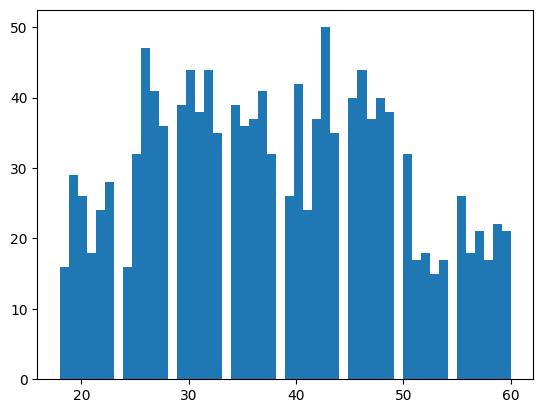

In [6]:
plt.hist(df['age'], bins = 50)

*Doesn't follow any particular  distribution*

In [7]:
values =  df['age'].dropna().to_numpy().reshape(-1, 1)
model = KernelDensity(bandwidth=3, kernel='gaussian')
model.fit(values)


KernelDensity(bandwidth=3)

In [10]:
new_val = np.linspace(values.min(), values.max(), 100)
new_val = new_val.reshape(len(new_val), 1)

In [11]:
prob = model.score_samples(new_val)
prob = np.exp(prob)

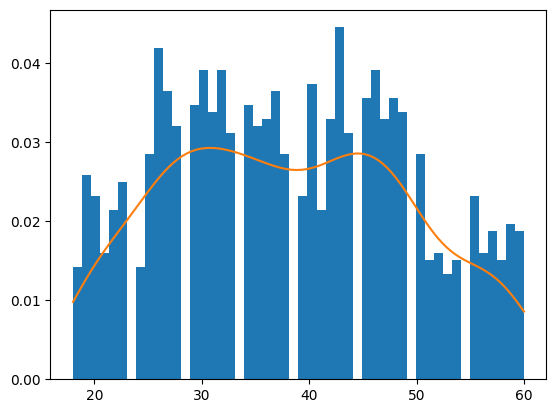

In [12]:
plt.hist(values, bins = 50, density = True)
plt.plot(new_val[:], prob)
plt.show()

### Q-2: What is the probability of a patient having a BMI greater than 30?

In [16]:
df['bmi'].isnull().sum()

0

In [20]:
greater = df[df['bmi']> 30]
prob = len(greater)/ len(df)
prob

0.5216417910447761

### Q-3: Plot distribution plot of claim for Smoker and non smoker. What changes you see in the plot?

<Axes: xlabel='claim', ylabel='Count'>

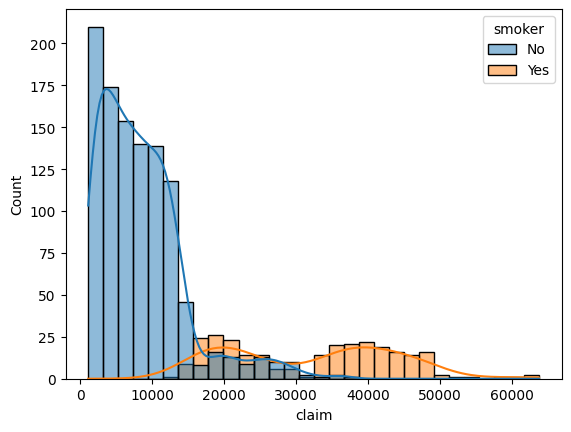

In [24]:
sns.histplot(df, x = 'claim', hue = 'smoker', kde=True)

### Q-4: Plot the 2D probability density plot of claim and age in the insurance dataset?

<Axes: xlabel='age', ylabel='claim'>

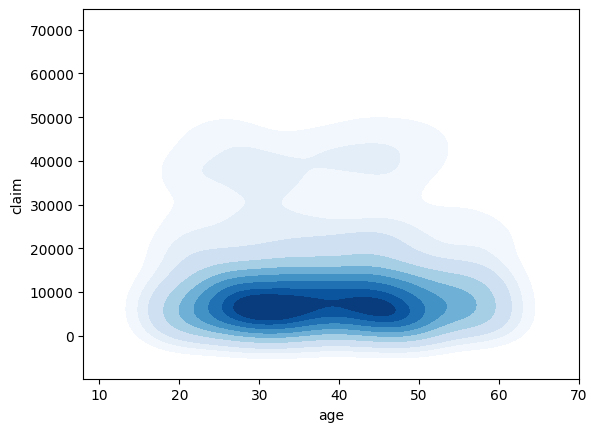

In [25]:
sns.kdeplot(x=df['age'], y=df['claim'], cmap="Blues", thresh=0.05, fill=True)

### Q-5: How does the disribution of claim changes for different region? Plot density plot and note down the observations

<Axes: xlabel='claim', ylabel='Density'>

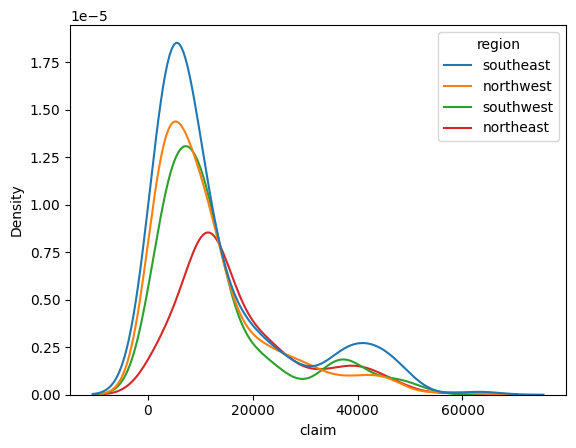

In [26]:
sns.kdeplot(df, x = "claim", hue = "region")

### Q6: Plot PDF and CDF of claim in insurance data

In [31]:
df.shape

(1340, 11)

In [29]:
claim_mean = df['claim'].mean()
claim_std = df['claim'].std()

In [33]:
dist = norm(claim_mean, claim_std)
prob = dist.pdf(df['claim'].values)

(array([6.40864750e-05, 4.74096971e-05, 1.53664596e-05, 1.02443064e-05,
        4.16919447e-06, 7.02807068e-06, 6.78983099e-06, 3.81183494e-06,
        2.38239684e-07, 4.76479368e-07]),
 array([ 1121.87 ,  7386.726, 13651.582, 19916.438, 26181.294, 32446.15 ,
        38711.006, 44975.862, 51240.718, 57505.574, 63770.43 ]),
 <BarContainer object of 10 artists>)

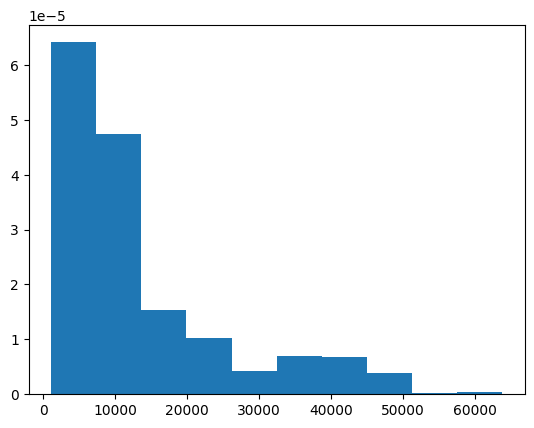

In [38]:
plt.hist(df['claim'], bins = 10, density= True)


<Axes: xlabel='claim', ylabel='Density'>

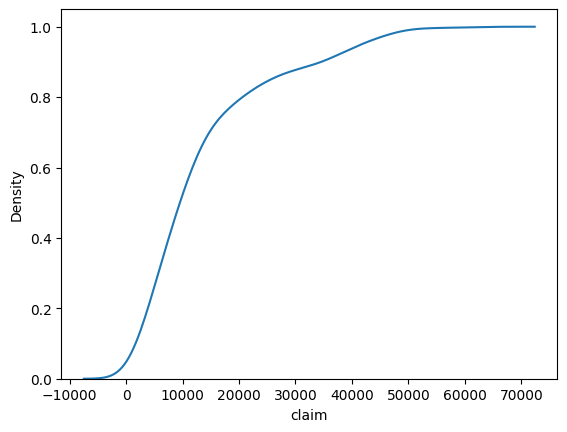

In [39]:
sns.kdeplot(df['claim'], cumulative=True)


### Q-7: Given a probability density function f(x) = 2x for 0 <= x <= 1 and f(x) = 0 otherwise, compute the cumulative distribution function F(x) and plot it. Use this to find the probability that X is greater than 0.5.